In [1]:
import pandas as pd
import numpy as np

In [151]:
df = pd.read_csv('data/pokedex_(Update_05.20).csv')

In [152]:
#drop irrelevant columns
#drop all against columns to not duplicate type info
df = df.drop(['generation','growth_rate','Unnamed: 0', 'german_name', 'japanese_name','species', 'height_m', 'weight_kg','against_normal','against_fire','against_water','against_grass','against_electric','against_ice','against_fight','against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy'],axis=1)
df = df.drop(['egg_type_number','egg_type_1','egg_type_2','egg_cycles','percentage_male','abilities_number', 'base_experience','catch_rate','base_friendship'],axis=1)

In [153]:
#drop columns with too much info
df = df.drop(['ability_1','ability_2','ability_hidden'],axis=1)

In [154]:
#drop all legendary, mythical etc.
df = df[df['status']=='Normal']
df = df.drop(['status'],axis=1)

In [155]:
#dropping type from new dataframe
X = df.drop(['type_1','type_2'],axis=1)

In [156]:
#convert type number to 1/0
X['type_number'] = X['type_number']-1

In [158]:
X_small = X[X['total_points']<=350]
X_large = X[X['total_points']>350]

In [160]:
#scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_col = ['total_points','hp','attack','defense','sp_attack','sp_defense','speed']
X_small[num_col] = scaler.fit_transform(X_small[num_col])
X_large[num_col] = scaler.fit_transform(X_large[num_col])

C:\Users\Andrew\AppData\Local\Temp\ipykernel_13780\169425172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_small[num_col] = scaler.fit_transform(X_small[num_col])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_13780\169425172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_large[num_col] = scaler.fit_transform(X_large[num_col])


In [161]:
X_small

,pokedex_number,name,type_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,1,Bulbasaur,1,0.672591,-0.219739,-0.175449,-0.046393,1.217857,1.203097,-0.167732
4,4,Charmander,0,0.448774,-0.639991,-0.011934,-0.381736,0.908129,0.189847,0.868112
9,7,Squirtle,0,0.573117,-0.289781,-0.229955,0.847856,0.288674,1.135547,-0.271317
13,10,Caterpie,0,-2.386253,-0.219739,-1.211046,-0.828860,-1.569691,-1.836655,-0.167732
14,11,Metapod,0,-2.137567,0.130470,-1.756098,0.288950,-1.259964,-1.498905,-0.944615
...,...,...,...,...,...,...,...,...,...,...
990,859,Impidimp,1,-0.645447,-0.219739,-0.393470,-1.108313,0.598402,-0.485654,0.091229
999,868,Milcery,0,-0.521104,-0.219739,-0.665995,-0.549408,0.288674,0.932897,-0.737446
1003,872,Snom,1,-2.634940,-1.270368,-1.483572,-0.828860,-0.021053,-1.161154,-1.462537
1012,878,Cufant,0,0.971015,1.671393,1.514209,-0.046393,-0.330781,0.122296,-0.426693


In [163]:
#some high correlations
X_small[num_col].corr()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
total_points,1.000000,0.312166,0.525475,0.406332,0.474076,0.435098,0.245972
hp,0.312166,1.000000,0.189008,0.025345,-0.020110,0.021446,-0.292036
attack,0.525475,0.189008,1.000000,0.262296,-0.063894,-0.248580,0.005332
defense,0.406332,0.025345,0.262296,1.000000,-0.135175,0.179663,-0.373147
sp_attack,0.474076,-0.020110,-0.063894,-0.135175,1.000000,0.291423,0.128638
sp_defense,0.435098,0.021446,-0.248580,0.179663,0.291423,1.000000,-0.050373
speed,0.245972,-0.292036,0.005332,-0.373147,0.128638,-0.050373,1.000000


In [164]:
X_large[num_col].corr()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
total_points,1.000000,0.309370,0.520421,0.381787,0.478012,0.440714,0.274800
hp,0.309370,1.000000,0.148008,-0.098086,-0.007404,0.004407,-0.147308
attack,0.520421,0.148008,1.000000,0.195269,-0.092663,-0.170582,0.089842
defense,0.381787,-0.098086,0.195269,1.000000,-0.132051,0.285561,-0.377169
sp_attack,0.478012,-0.007404,-0.092663,-0.132051,1.000000,0.217120,0.157704
sp_defense,0.440714,0.004407,-0.170582,0.285561,0.217120,1.000000,-0.152896
speed,0.274800,-0.147308,0.089842,-0.377169,0.157704,-0.152896,1.000000


array([[<Axes: title={'center': 'total_points'}>,
        <Axes: title={'center': 'hp'}>,
        <Axes: title={'center': 'attack'}>],
       [<Axes: title={'center': 'defense'}>,
        <Axes: title={'center': 'sp_attack'}>,
        <Axes: title={'center': 'sp_defense'}>],
       [<Axes: title={'center': 'speed'}>, <Axes: >, <Axes: >]],
      dtype=object)

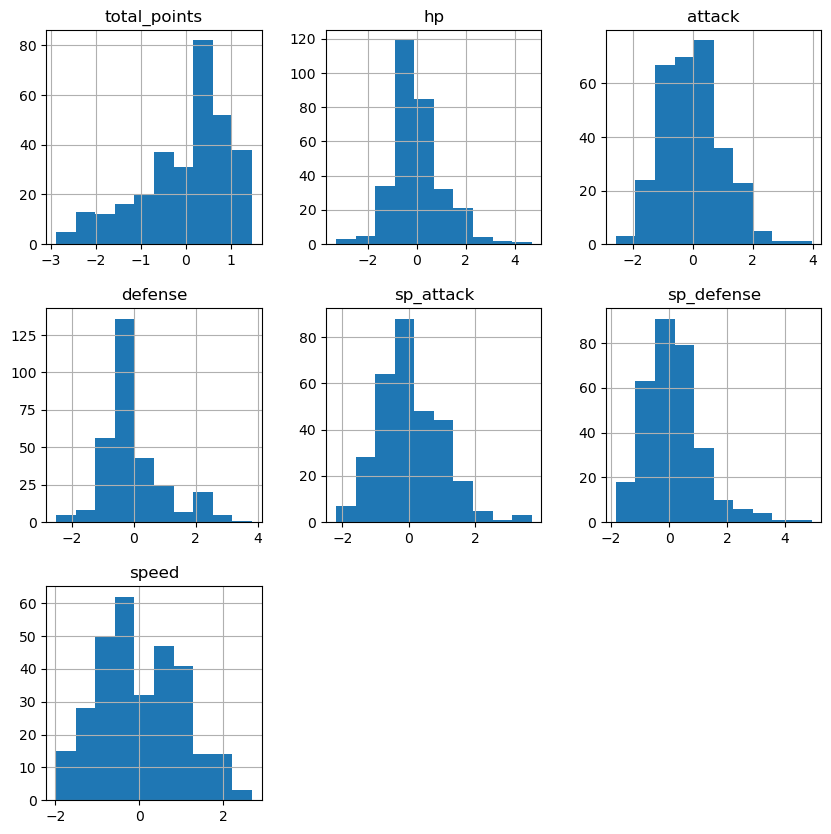

In [165]:
X_small[num_col].hist(figsize = (10,10))

<Axes: xlabel='total_points', ylabel='Count'>

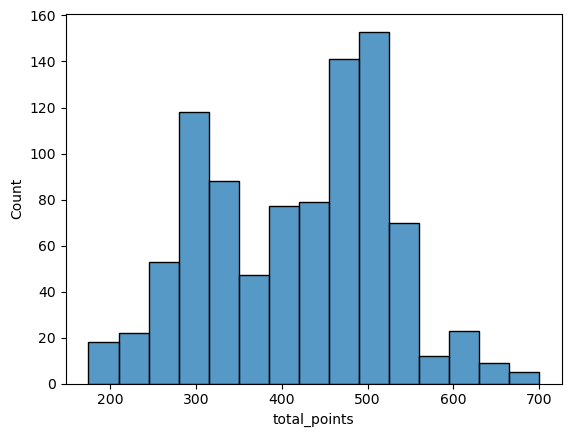

In [174]:
import seaborn as sns
sns.histplot(X['total_points'])

<Axes: >

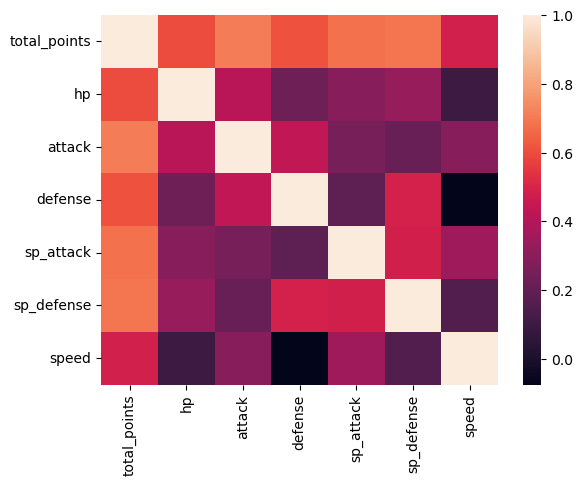

In [177]:
sns.heatmap(df[num_col].corr())

In [178]:
df[num_col].corr()

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
total_points,1.000000,0.599344,0.706270,0.611602,0.678156,0.693407,0.487491
hp,0.599344,1.000000,0.414430,0.224839,0.293388,0.330815,0.098548
attack,0.706270,0.414430,1.000000,0.436095,0.249016,0.214019,0.293237
defense,0.611602,0.224839,0.436095,1.000000,0.188061,0.491184,-0.075142
sp_attack,0.678156,0.293388,0.249016,0.188061,1.000000,0.482180,0.347839
sp_defense,0.693407,0.330815,0.214019,0.491184,0.482180,1.000000,0.155192
speed,0.487491,0.098548,0.293237,-0.075142,0.347839,0.155192,1.000000


array([[<Axes: title={'center': 'total_points'}>,
        <Axes: title={'center': 'hp'}>,
        <Axes: title={'center': 'attack'}>],
       [<Axes: title={'center': 'defense'}>,
        <Axes: title={'center': 'sp_attack'}>,
        <Axes: title={'center': 'sp_defense'}>],
       [<Axes: title={'center': 'speed'}>, <Axes: >, <Axes: >]],
      dtype=object)

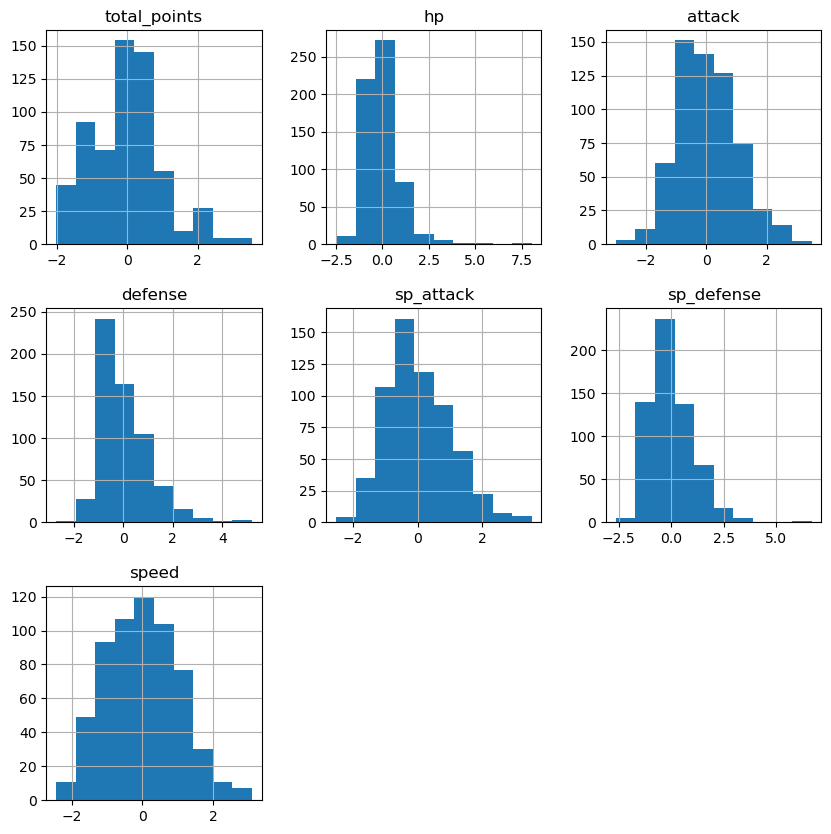

In [166]:
X_large[num_col].hist(figsize = (10,10))

In [168]:
#drop identifiers and save file
X_small = X_small.drop(['name','pokedex_number'],axis=1)
X_large = X_large.drop(['name','pokedex_number'],axis=1)

In [169]:
X_small.to_csv('data/pokemon_small.csv',index=False)
X_large.to_csv('data/pokemon_large.csv',index=False)